In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()



'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [3]:
sys.path.append('../../girg-sampling/')

In [4]:
sys.path

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug',
 '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev',
 '/cluster/home/bdayan',
 '/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python38.zip',
 '/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8',
 '/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/lib-dynload',
 '',
 '/cluster/home/bdayan/girgs/venvtemp/lib64/python3.8/site-packages',
 '/cluster/home/bdayan/girgs/girg-sampling-temp',
 '../',
 '../../nemo-eva/src/',
 '../../girg-sampling/']

In [5]:
os.getcwd()

'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [47]:

from benji_girgs import utils, generation, points, fitting, mcmc

import networkit

import networkit as nk

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt


# import do_feature_extract
import networkx as nx


In [162]:
n = 4000
d=2
tau=2.1
alpha=1.2
desiredAvgDegree=60.0

# pp = points.get_points_distorted(np.array([2.0, 1.0]), cube=True)
pp = points.PointsCube

g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree,
                                                                points_type=pp)

g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

../benji_girgs/generation.py:125: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)


Network Properties:
nodes, edges			4000, 96985
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.012126
clustering coefficient		0.562997
min/max/avg degree		3, 2185, 48.492500
degree assortativity		-0.219925
number of connected components	1
size of largest component	4000 (100.00 %)


<Figure size 640x480 with 0 Axes>

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  7.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          1., 13.,  8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          1.,  9., 16.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0., 12., 22., 10.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          1., 11., 14.,  8.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          1.,  4., 10., 11.,  1.,  1

<Figure size 640x480 with 0 Axes>

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3., 13., 28., 34.,
         25., 16.,  9.,  1.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  8., 18., 14., 18.,
         18.,  6., 14., 14.,  8.,  5.,  3.,  5.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  5.,  3.,  4.,  9.,
          8.,  6.,  6.,  9., 14., 14., 10., 13., 11.,  3.,  5.,  1.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  8., 12.,  5.,  5.,  4.,
          6.,  8.,  3.,  2.,  3., 13.,  7., 11.,  5.,  9.,  7., 14.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., 11., 14., 10.,  9.,  5.,  6.,  6.,  3.,
          3.,  8.,  2.,  2.,  3.,  9., 11.,  5.,  5.,  6.,  4.,  7.,  2.,
          1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  6.,  8., 12.,  5., 14.,  9.,  8., 10.,  5.,
          2.,  1.,  4.,  3.,  2.,  3

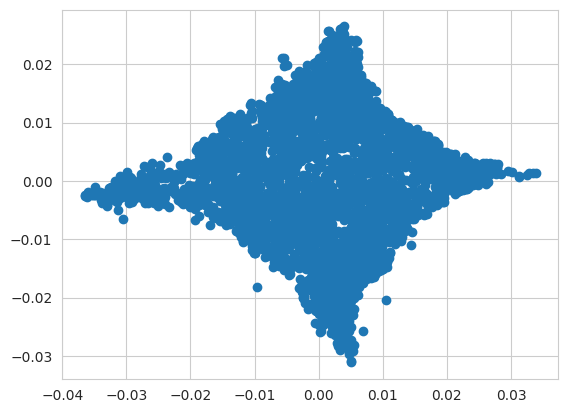

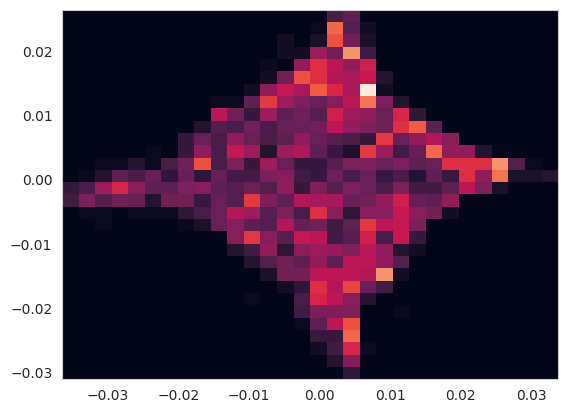

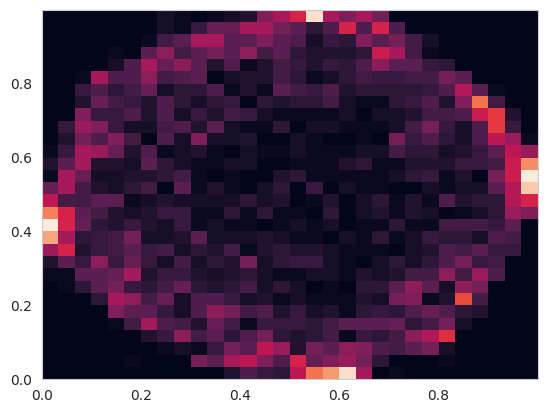

In [164]:
a, B, _, diff_map = utils.get_diffmap(g)
pts_temp = np.array([diff_map(i, 10) for i in range(n)])
plt.scatter(pts_temp[:, 0], pts_temp[:, 1])
plt.figure()
plt.hist2d(pts_temp[:, 0], pts_temp[:, 1], bins=30)


pts_temp_uniformed = utils.uniformify_pts(pts_temp)
plt.figure()
plt.hist2d(pts_temp_uniformed[:, 0], pts_temp_uniformed[:, 1], bins=30)

<Figure size 640x480 with 0 Axes>

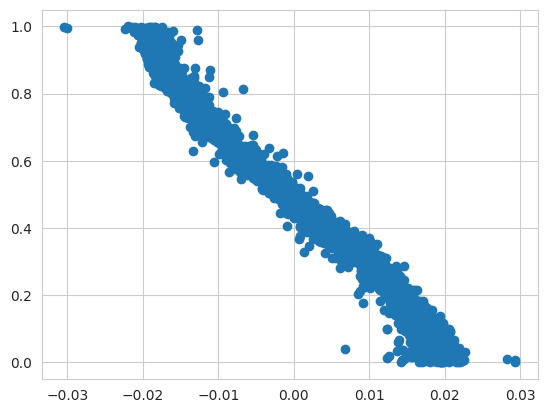

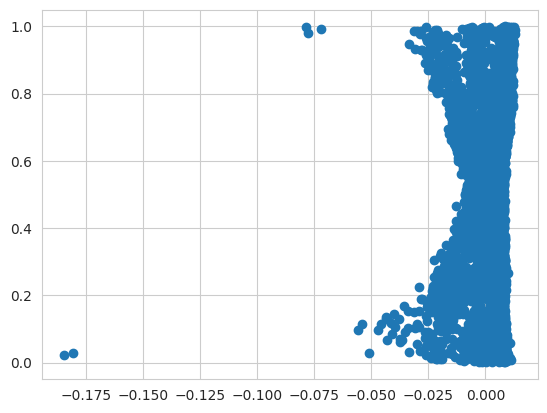

In [142]:
plt.scatter(pts_temp[:, 0], pts[:, 0])
plt.figure()
plt.scatter(pts_temp[:, 1], pts[:, 1])

In [156]:
def cubify_last_k_dim(pts, k=1, num_near=50):
    pts_kdtree = KDTree(pts[:, 0:k])
    output = []
    for u in range(n):
        distances, indices = pts_kdtree.query(pts[u:u+1, 0:k], k=num_near)
        second_dim = pts[indices, 1]
        u_second_dim = pts[u, 1]
        output.append(scipy.stats.percentileofscore(second_dim, u_second_dim)[0]/100)
    return output

output = extract_2nd_dim_idk(pts_temp)
pts_temp_fixed = pts_temp.copy()
pts_temp_fixed[:, 1] = output

(array([[ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 2.,  0.,  1.,  3.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          1.,  0.,  0.,  0.],
        [11.,  9.,  3.,  8., 12.,  6., 10.,  6.,  3.,  9.,  3., 16.,  7.,
          5.,  7.,  8.,  5., 11.,  7

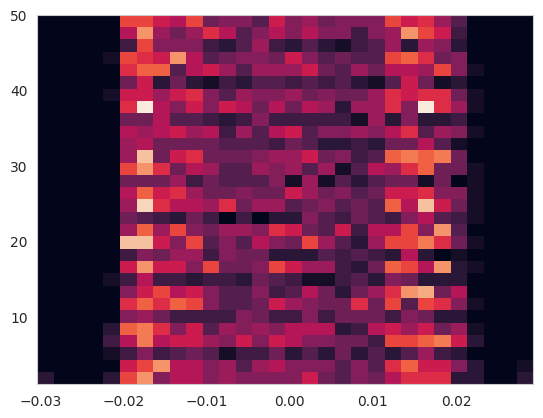

In [157]:
plt.hist2d(pts_temp_fixed[:, 0], pts_temp_fixed[:, 1], bins=30)

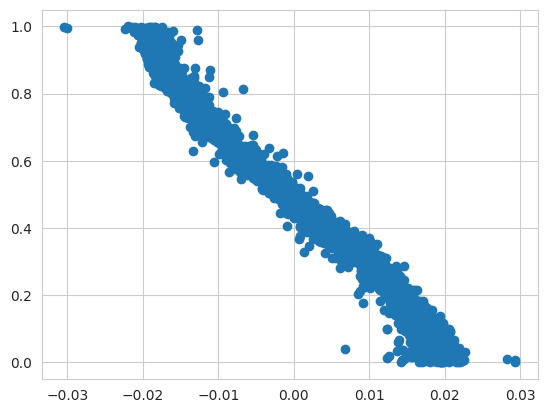

In [158]:
plt.scatter(pts_temp_fixed[:, 0], pts[:, 0])

(array([[21., 14., 10.,  9., 12.,  5.,  5.,  1.,  3.,  4.,  1.,  2.,  0.,
          1.,  2.,  2.,  0.,  2.,  5.,  3.,  2.,  2.,  2.,  7.,  1.,  5.,
          6., 12., 13.,  9.],
        [12., 10., 12.,  9., 13., 11.,  3.,  4.,  5.,  3.,  0.,  2.,  2.,
          1.,  1.,  2.,  2.,  2.,  4.,  6.,  4.,  1.,  6.,  5.,  4.,  6.,
          5., 12.,  7.,  9.],
        [ 5.,  4.,  6.,  9.,  4.,  2.,  4.,  1.,  3.,  2.,  0.,  0.,  0.,
          1.,  1.,  1.,  0.,  1.,  1.,  2.,  7.,  2.,  4.,  2.,  3.,  2.,
          3.,  1.,  1.,  3.],
        [14., 14., 14.,  9., 11.,  9.,  9.,  5.,  4.,  2.,  1.,  0.,  2.,
          4.,  2.,  4.,  4.,  3.,  1.,  4.,  3.,  6.,  3.,  3.,  4., 12.,
         13.,  7.,  4.,  7.],
        [ 1., 10., 10., 11., 12., 16.,  9.,  9.,  4.,  1.,  4.,  1.,  1.,
          4.,  2.,  2.,  0.,  3.,  5.,  8.,  3.,  2.,  3.,  5.,  4.,  8.,
          2.,  5.,  4.,  8.],
        [ 4.,  6.,  5.,  7.,  1.,  4.,  8.,  4.,  2.,  3.,  2.,  0.,  2.,
          1.,  1.,  2.,  1.,  5.,  2

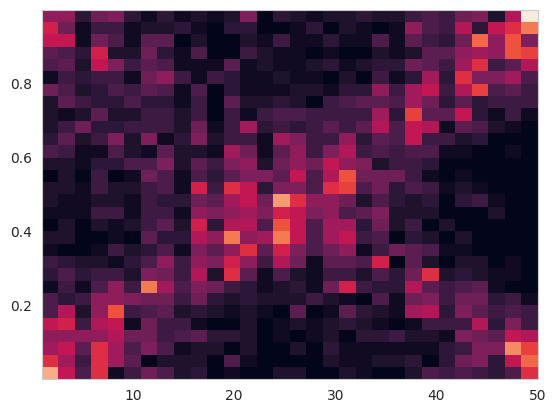

In [161]:
plt.hist2d(pts_temp_fixed[:, 1], pts[:, 1], bins=30)

In [119]:
pts = pts_temp
pts_kdtree = KDTree(pts[:, 0:1])
output = []
for u in range(n):
    distances, indices = pts_kdtree.query(pts[u:u+1, 0:1], k=50)
    second_dim = pts[indices, 1].squeeze()
    u_second_dim = pts[u, 1]
    output.append(scipy.stats.percentileofscore(second_dim, u_second_dim)/100)


[0.56,
 0.84,
 0.38,
 0.1,
 0.98,
 0.84,
 0.92,
 0.16,
 0.48,
 0.86,
 0.2,
 0.1,
 0.48,
 0.04,
 0.52,
 0.2,
 0.1,
 0.3,
 0.08,
 0.9,
 0.74,
 0.9,
 0.12,
 0.84,
 0.4,
 0.9,
 0.48,
 0.48,
 0.36,
 0.5,
 0.98,
 0.46,
 0.86,
 0.46,
 0.02,
 0.64,
 0.26,
 0.74,
 0.06,
 0.3,
 0.64,
 0.26,
 0.62,
 0.88,
 0.26,
 0.96,
 0.04,
 0.52,
 0.04,
 0.88,
 0.62,
 0.48,
 0.62,
 0.86,
 0.06,
 0.62,
 0.9,
 0.18,
 0.06,
 0.76,
 0.96,
 0.66,
 0.2,
 0.36,
 0.14,
 0.16,
 0.32,
 0.12,
 0.7,
 0.46,
 0.9,
 0.26,
 0.18,
 0.76,
 0.04,
 0.6,
 0.5,
 0.36,
 0.18,
 0.92,
 0.94,
 0.12,
 0.56,
 0.22,
 0.82,
 0.04,
 0.6,
 0.9,
 0.54,
 0.72,
 0.58,
 0.74,
 0.6,
 0.74,
 0.74,
 0.42,
 0.14,
 0.94,
 0.8,
 0.28,
 0.82,
 0.74,
 0.74,
 0.02,
 0.84,
 0.18,
 0.06,
 0.36,
 0.66,
 0.04,
 0.5,
 0.62,
 0.36,
 0.3,
 0.54,
 0.6,
 0.98,
 0.3,
 0.92,
 0.68,
 0.34,
 0.86,
 0.18,
 0.3,
 0.7,
 0.62,
 0.1,
 0.74,
 0.8,
 0.12,
 0.66,
 0.5,
 0.62,
 0.66,
 0.76,
 0.48,
 0.86,
 0.66,
 0.94,
 0.58,
 0.88,
 0.32,
 0.06,
 0.92,
 0.08,
 0.54,
 0.66,
 0

In [117]:
print(indices)
print(second_dim.squeeze())
print(u_second_dim)
print(scipy.stats.percentileofscore(second_dim.squeeze(), u_second_dim))

[[3999 1587  964 2469 3688  248 2062 2212 3436  690 3894  218  562 2285
  3228 3658 1070 3024  809 3281  247 1592 2054 1516 3951 1571 1359  340
  3672  303 3518 3235 2728 2372 3550  841 2327 2688  198 1782 1615 1760
  2642  342 1165 1257 2312  277 3826 1042]]
[ 7.81195955e-03 -4.56814807e-04 -4.40870398e-03 -1.52129918e-02
  9.40824995e-03  7.99778920e-03  8.55846225e-03 -3.05316088e-03
  8.67170331e-03  6.49728485e-03  7.89208129e-03  8.44915477e-03
 -5.45746331e-03  6.64001503e-03  1.12210320e-02  8.91140235e-05
  4.22192084e-03 -1.07120216e-02  1.36758055e-03  3.41330118e-04
 -1.96166198e-02  8.96876211e-03  8.90504861e-03  3.41151539e-03
  2.15179173e-03  8.09084259e-03  9.66344197e-03 -1.11443060e-03
 -1.28057261e-02 -4.12605205e-03 -4.70360886e-03  8.57235684e-03
 -1.63908526e-02 -1.63013762e-02  6.64037987e-03 -6.09577481e-03
 -7.52983533e-03  9.52387276e-03  8.86870283e-03 -1.64936828e-02
 -4.97765305e-03 -1.21187945e-02  1.12474421e-02  1.20715671e-02
 -2.38236426e-03 -1.39726

In [103]:
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
scipy.stats.percentileofscore(data, 20)/100

1.0

In [ ]:

# pts_temp2 = diffmap_iterate(pts_temp[:, :2])
pts_list = [pts_temp2[:, :2]]
for _ in range(3):
    print(_)
    pts_list.append(diffmap_iterate(pts_list[-1]))


In [86]:
np.percentile([0, 0.3, 0.2, 0.1], 0.3)

0.0009000000000000002

In [77]:
def diffmap_iterate(pts):
    pts_kdtree = KDTree(pts)
    g2 = nk.Graph(n)
    for u in range(n):
        distances, indices = pts_kdtree.query(pts[u:u+1, :], k=50)
        for v in indices[0, 1:]:
            if not g2.hasEdge(u, v):
                _ = g2.addEdge(u, v)

    a, B, _, diff_map = utils.get_diffmap(g2)
    pts_temp = np.array([diff_map(i, 10) for i in range(n)])
    pts_temp = pts_temp[:pts.shape[0], :pts.shape[1]]
    pts_temp2 = utils.uniformify_pts(pts_temp)
    return pts_temp2

# pts_temp2 = diffmap_iterate(pts_temp[:, :2])
pts_list = [pts_temp2[:, :2]]
for _ in range(3):
    print(_)
    pts_list.append(diffmap_iterate(pts_list[-1]))


0
1
2


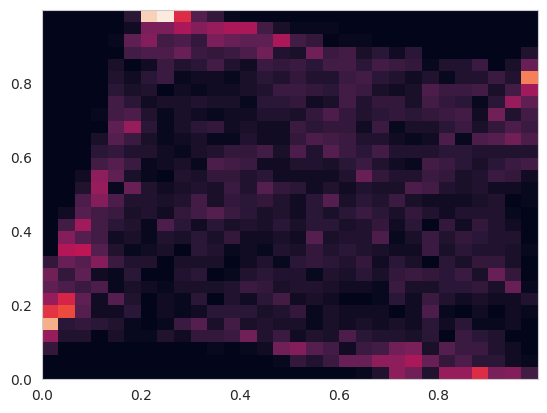

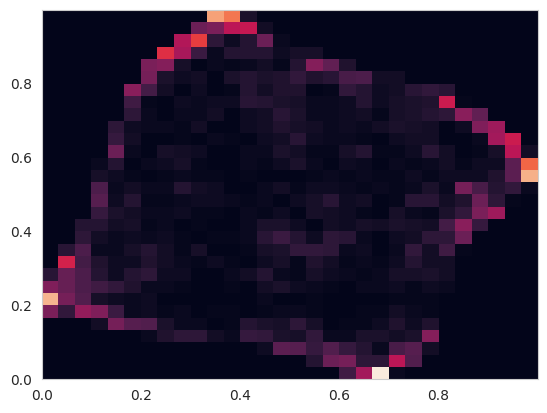

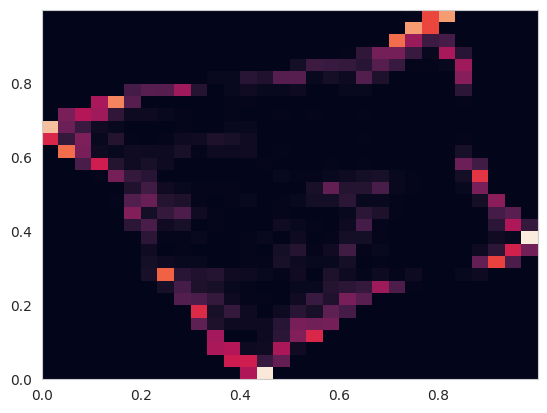

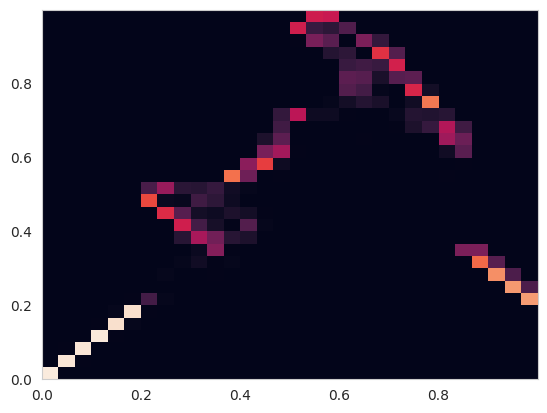

In [78]:
for i in range(4):
    _ = plt.figure()
    _ = plt.hist2d(pts_list[i][:, 0], pts_list[i][:, 1], bins=30)

In [87]:
from sklearn.neighbors import KDTree
pts_kdtree = KDTree(pts_temp)
distances, indices = pts_kdtree.query(pts_temp[0, :], k=4)
print(distances)
print(indices)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.00627328 -0.00292548 -0.00359095 -0.00960973  0.00672209 -0.00732235
  0.00100774  0.00491522  0.00172934].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:
g2 = nk.Graph(g.numberOfNodes())
for u in range(g.numberOfNodes()):
    distances, indices = pts_kdtree.query(pts_temp[u:u+1, :], k=g.degree(u)+1)
    for v in indices[0, 1:]:
        if not g2.hasEdge(u, v):
            _ = g2.addEdge(u, v)

(array([[  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   6.,   7.,  16.],
        [ 21.,  21.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   2.,  11.,   9.,   4.,   0.,   0.],
        [  0.,   0.,  32.,  23.,  16.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          12.,   9.,   6.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   7.,  14.,  17.,   8.,  29.,  15.,   4.,   4.,
           7.,  19.,  15.,  16.,   8.,   8.,  14.,  15.,  22.,  24.,  20.,
           4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  10.,  21.,   0.,   2.,   3.,   8.,  12.,
          13.,   4.,   7.,  15.,  28.,   7.,   4.,   8.,  27.,   2.,   0.,
           0.,   0

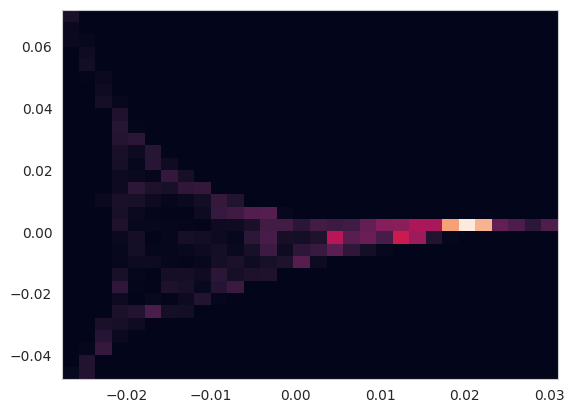

In [43]:
a2, B2, _, diff_map2 = utils.get_diffmap(g2)
pts_temp2 = np.array([diff_map2(i, 10) for i in range(n)])
# plt.scatter(pts_temp[:, 0], pts_temp[:, 1])
# plt.figure()
plt.hist2d(pts_temp2[:, 0], pts_temp2[:, 1], bins=30)

# plt.hist(pts_temp[:, 0], bins=20)

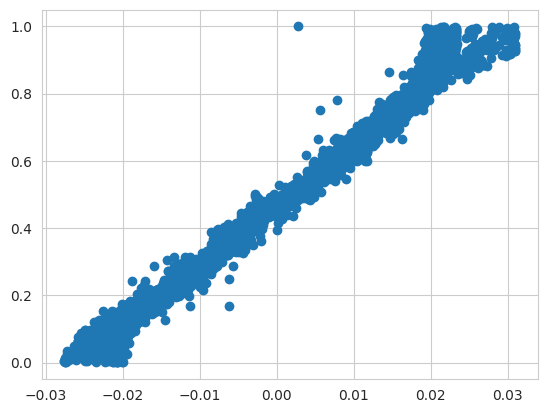

In [44]:
plt.scatter(pts_temp2[:, 0], pts[:, 0])

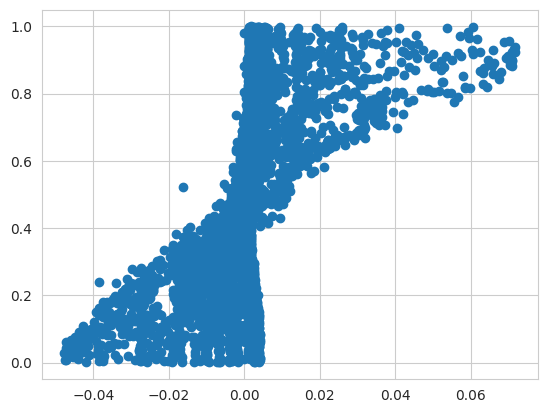

In [45]:
plt.scatter(pts_temp2[:, 1], pts[:, 1])

In [48]:
np.corrcoef(pts_temp[:, 0], pts[:, 0])
np.corrcoef(pts_temp[:, 1], pts[:, 1])
np.corrcoef(pts_temp2[:, 0], pts[:, 0])
np.corrcoef(pts_temp2[:, 1], pts[:, 1])

array([[ 1.        , -0.99287159],
       [-0.99287159,  1.        ]])

array([[1.        , 0.61153502],
       [0.61153502, 1.        ]])

array([[1.        , 0.99075737],
       [0.99075737, 1.        ]])

array([[1.      , 0.629735],
       [0.629735, 1.      ]])

In [37]:
distances, indices = pts_kdtree.query(pts_temp[0:2, :], k=4)
print(distances)
print(indices)

[[0.         0.0029061  0.00308923 0.00365632]
 [0.         0.00249767 0.0026319  0.00280892]]
[[   0 1896 3401 1261]
 [   1  545   10 3233]]


In [31]:
indices

array([[   0, 1896],
       [   1,  545],
       [   2, 2950],
       ...,
       [3997, 2162],
       [3998, 3443],
       [3999, 3370]])

(array([[92., 28.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  2.,  2.,  4.,  1.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [24., 16., 18., 24.,  6.,  1.,  2.,  3.,  2.,  4.,  0.,  0.,  6.,
          2.,  1.,  1.,  3.,  2.,  1.,  3.,  1.,  1.,  2.,  5.,  2.,  3.,
          0.,  0.,  0.,  0.],
        [12., 19.,  8., 11., 13.,  1.,  5.,  5.,  3.,  5.,  2.,  6.,  2.,
          5.,  7.,  8.,  9.,  5.,  2.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 2., 14.,  9.,  6.,  9.,  3.,  5.,  3.,  6.,  6.,  5.,  6.,  7.,
          6.,  7.,  7.,  7.,  9.,  4.,  5.,  4.,  2.,  0.,  1.,  1.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  8., 17., 10., 10.,  3.,  3.,  2.,  6.,  6.,  4.,  4.,  5.,
          3.,  5.,  5.,  4.,  8.,  6.,  5.,  5.,  4.,  4.,  2.,  1.,  0.,
          0.,  1.,  2.,  0.],
        [ 1.,  2.,  5., 13.,  9.,  9.,  3.,  5.,  1.,  4.,  6.,  4.,  6.,
          5.,  5.,  3., 10.,  3.,  3

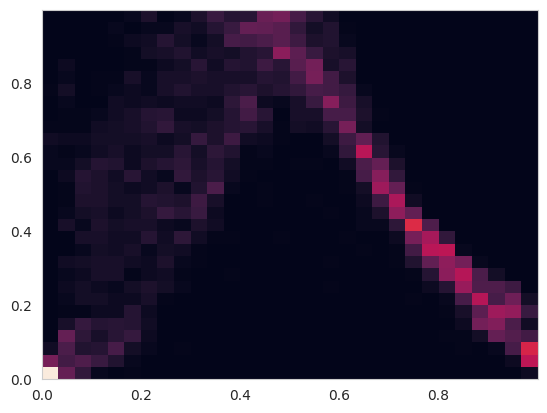

In [27]:
pts_temp2 = utils.uniformify_pts(pts_temp)
plt.hist2d(pts_temp2[:, 0], pts_temp2[:, 1], bins=30)


In [23]:
B[:, 1]

array([ 0.00166173, -0.0067023 ,  0.00018287, ..., -0.00447249,
       -0.0123464 ,  0.00222025])

(array([ 62., 139., 121., 132., 136., 132., 170., 185., 218., 205.]),
 array([-0.02804993, -0.02299485, -0.01793978, -0.0128847 , -0.00782963,
        -0.00277455,  0.00228052,  0.0073356 ,  0.01239067,  0.01744575,
         0.02250082]),
 <BarContainer object of 10 artists>)

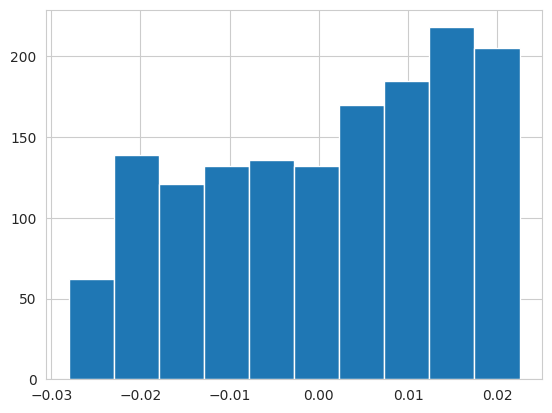

In [11]:
plt.hist(pts_temp[:, 0])

In [9]:
import importlib
importlib.reload(mcmc)
from tests import test_mcmc

In [10]:
g, A, weights, const, pts, MC = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=2, diffmap_init=True)

calibrating const


../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)


const: 4.139700367419944, expected_num_edges: 614249.7069294208
const: 0.4082349689829133, expected_num_edges: 187182.2366688604
const: 0.13210882320482928, expected_num_edges: 89936.44578414781
const: 0.08897794200157089, expected_num_edges: 68198.06104202526
const: 0.07903083718878552, expected_num_edges: 62642.33938725545
const: 0.07642137855482853, expected_num_edges: 61140.29814206669
const: 0.07571354287190113, expected_num_edges: 60729.26091192236


In [11]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
np.set_printoptions(formatter={'int_kind': '{:,}'.format})

nk.overview(g_dm)


Network Properties:
nodes, edges			1500, 59899
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.053279
clustering coefficient		0.444639
min/max/avg degree		8, 667, 79.865333
degree assortativity		-0.042482
number of connected components	1
size of largest component	1500 (100.00 %)


In [12]:
nk.overview(g)

Network Properties:
nodes, edges			1500, 60574
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.053879
clustering coefficient		0.587666
min/max/avg degree		12, 1499, 80.765333
degree assortativity		-0.218035
number of connected components	1
size of largest component	1500 (100.00 %)


In [13]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)

out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(A, A_dm)
print(out)
print(percent_edges_captured)
print(percent_fake_edges_wrong)
print()


[[58,054 63,094]
 [61,876 2,066,976]]
0.4791989962690263
0.5159342950054199



(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
          1.,  4.,  3.,  7.,  6.,  9., 12.,  3.,  1.,  2.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  5.,  3.,  2.,  1.,
          3.,  1.,  4.,  2.,  4.,  2.,  2.,  4.,  8.,  4.,  4.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  7.,  3.,  2.,  5.,
          0.,  0.,  2.,  2.,  2.,  2.,  2.,  6.,  6.,  4.,  3.,  2.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  4.,  3.,  1.,  2.,  4.,
          1.,  2.,  5.,  2.,  1.,  2.,  5.,  2.,  9.,  4.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  2.,  5.,  4.,  1.,  5.,  1.,  2.,
          3.,  1.,  4.,  1.,  3.,  4.,  3.,  1.,  1.,  2.,  3.,  3.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  4.,  6.,  4.,  3.,  2.,  0.,  0.,  6.,  2.,
          1.,  0.,  1.,  2.,  4.,  0

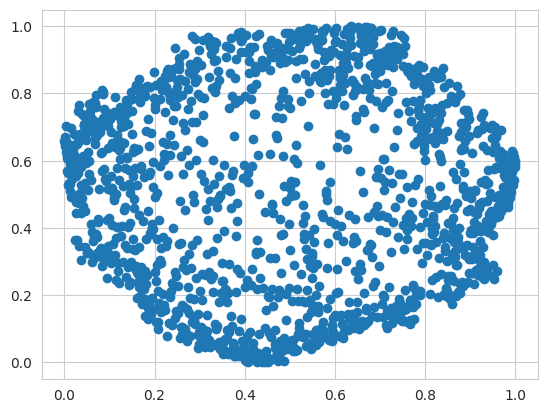

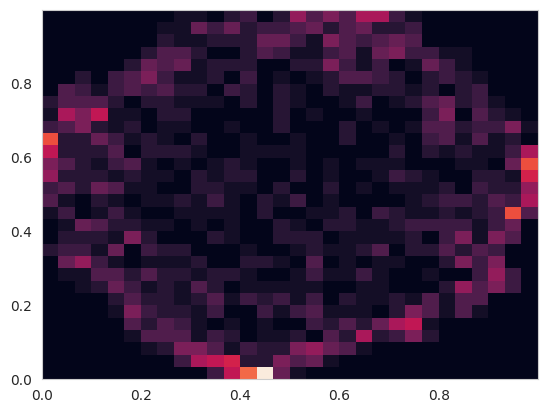

In [14]:
%matplotlib inline
# a = MC.pts[:, 0]
# plt.hist(a[a<0.04], bins=50)

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.figure()
plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [15]:
MC.ll

-434593.6148248857

In [31]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [32]:
MC.run_pool(100000, pool_size=15, jobs_per_worker=25, plot_every=3000)

100125it [02:55, 571.77it/s]                           


In [27]:
fig.savefig('temp_pyplot', dpi='figure')

In [26]:
os.getcwd()

'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [23]:
fig = plt.gcf()
fig.axes

[<AxesSubplot: title={'center': 'n_steps: 23625 / 10000, num_acceptances: 13039'}, ylabel='log likelihood'>,
 <AxesSubplot: ylabel='percent edges captured in CM'>]

In [24]:
fig.clf()

In [25]:
fig.axes

[]

In [38]:
print(MC.ll)

-295090.3483605681


In [39]:
a, b = MC.calculate_ll()
print(a)

-295096.24275938654


(array([[3., 0., 3., 1., 3., 4., 1., 2., 1., 4., 4., 2., 0., 4., 4., 4.,
         3., 6., 6., 6., 4., 2., 4., 2., 1., 4., 1., 1., 2., 1.],
        [2., 2., 1., 2., 2., 0., 0., 2., 2., 3., 3., 3., 3., 1., 2., 3.,
         1., 3., 2., 0., 3., 7., 5., 4., 2., 0., 0., 1., 1., 1.],
        [1., 1., 1., 0., 3., 0., 1., 4., 1., 4., 0., 1., 2., 0., 1., 3.,
         3., 2., 2., 3., 2., 1., 2., 2., 5., 3., 1., 0., 2., 1.],
        [4., 2., 3., 2., 1., 2., 1., 3., 0., 0., 3., 1., 4., 2., 1., 2.,
         1., 2., 0., 3., 0., 4., 1., 0., 1., 2., 2., 1., 1., 2.],
        [0., 1., 1., 0., 0., 3., 1., 4., 1., 3., 2., 1., 1., 1., 0., 2.,
         1., 2., 1., 1., 1., 4., 2., 2., 1., 2., 2., 2., 0., 1.],
        [4., 1., 2., 4., 3., 5., 1., 5., 2., 1., 0., 3., 2., 3., 1., 2.,
         4., 2., 3., 3., 1., 1., 1., 1., 3., 1., 1., 0., 0., 4.],
        [1., 2., 1., 1., 0., 5., 0., 1., 2., 2., 1., 2., 2., 1., 2., 0.,
         1., 1., 0., 1., 2., 0., 2., 2., 4., 1., 3., 2., 1., 2.],
        [3., 1., 5., 3., 2.

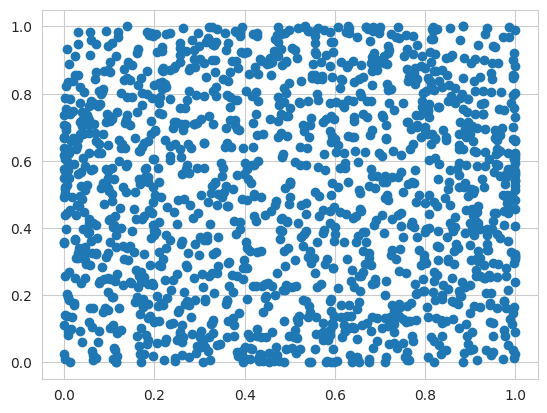

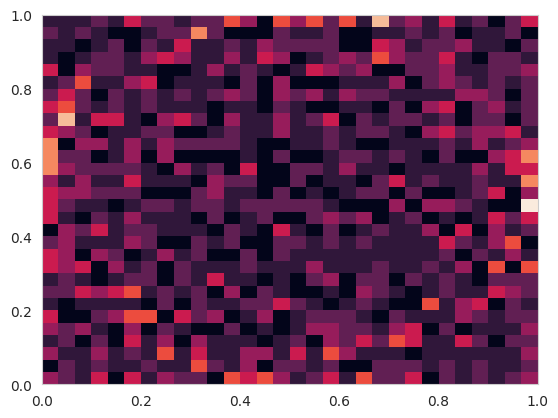

In [24]:
%matplotlib inline
# a = MC.pts[:, 0]
# plt.hist(a[a<0.04], bins=50)

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.figure()
plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [29]:
MC.expected_num_edges

60594.809209926796

In [20]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)

out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(A, A_dm)
print(out)
print(percent_edges_captured)
print(percent_fake_edges_wrong)


[[55,674 65,474]
 [64,110 2,064,742]]
0.45955360385644006
0.5352133840913644


In [25]:
nk.overview(g_dm)
nk.overview(g)
nk.overview(g_init)

Network Properties:
nodes, edges			1500, 456007
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.405610
clustering coefficient		0.650004
min/max/avg degree		145, 1499, 608.009333
degree assortativity		-0.104838
number of connected components	1
size of largest component	1500 (100.00 %)
Network Properties:
nodes, edges			1500, 60881
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.054153
clustering coefficient		0.526791
min/max/avg degree		9, 1317, 81.174667
degree assortativity		-0.171705
number of connected components	1
size of largest component	1500 (100.00 %)
Network Properties:
nodes, edges			1500, 517006
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.459867
clustering coefficient		0.686715
min/max/avg degree		156, 1499, 689.341333
degree assortativity		-0.118490
number of connected components	1
size of largest component	1500 (100.00 %)


In [34]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
# g_init, A_init = test_mcmc.MC_to_g_A(MC_init)

nk.overview(g_dm)
nk.overview(g_init)

CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)
':)'

const_in: 0.3975894770262727
Network Properties:
nodes, edges			3745, 134811
directed?			False
weighted?			False
isolated nodes			15
self-loops			0
density				0.019229
clustering coefficient		0.302392
min/max/avg degree		0, 553, 71.995194
degree assortativity		0.107403
number of connected components	16
size of largest component	3730 (99.60 %)
Network Properties:
nodes, edges			3745, 129178
directed?			False
weighted?			False
isolated nodes			10
self-loops			0
density				0.018426
clustering coefficient		0.330564
min/max/avg degree		0, 567, 68.986916
degree assortativity		0.002647
number of connected components	11
size of largest component	3735 (99.73 %)


array([[0.0015478 , 0.01013146],
       [0.01767655, 0.97064419]])

array([[0.13252585, 0.86747415],
       [0.01788543, 0.98211457]])

array([[7.47378347e-04, 1.09318878e-02],
       [1.76736940e-02, 9.70647040e-01]])

array([[0.06399189, 0.93600811],
       [0.01788255, 0.98211745]])

':)'

In [ ]:
MC.plot_ll(MC.num_steps)

In [26]:
MC.calculate_ll()

-1202958.4914603485

In [102]:
MC.ll_steps

[0,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 12,
 13,
 15,
 16,
 17,
 18,
 23,
 24,
 26,
 27,
 28,
 29,
 31,
 32,
 34,
 36,
 39,
 44,
 45,
 49,
 55,
 57,
 58,
 61,
 67,
 73,
 74,
 78,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 89,
 91,
 92,
 93,
 94,
 97,
 98,
 99,
 101,
 107,
 112,
 114,
 115,
 116,
 122,
 123,
 124,
 125,
 131,
 134,
 135,
 136,
 137,
 139,
 140,
 142,
 143,
 144,
 145,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 167,
 168,
 169,
 170,
 172,
 175,
 176,
 177,
 179,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 189,
 190,
 194,
 195,
 198,
 202,
 203,
 204,
 205,
 208,
 211,
 212,
 214,
 215,
 217,
 218,
 219,
 221,
 222,
 226,
 227,
 228,
 229,
 230,
 231,
 233,
 234,
 236,
 237,
 241,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 253,
 256,
 257,
 259,
 263,
 264,
 266,
 267,
 273,
 275,
 276,
 277,
 280,
 285,
 286,
 288,
 289,
 290,
 291,
 297,
 300,
 301,
 302,
 303,
 305,
 307,
 308,
 311,
 312,
 315,
 316,
 319,
 320,
 325,
 326,
 331,
 333,
 340,
 342,
 344,
 345,
 346,
 347,
 34

In [81]:
MC.calculate_ll()

-1197406.9692224392

In [77]:
MC.calculate_ll()

-1199493.5638940108

In [44]:
def mcmc_girg_init_worker(pts, pts_shape, pts_init, weights, g):
    mp_var_dict = mcmc.mp_var_dict
    mp_var_dict['pts'] = pts
    mp_var_dict['pts_shape'] = pts_shape
    # mp_var_dict['pts_init'] = None
    if 'pts_init' in mp_var_dict:
        del(mp_var_dict['pts_init'])
    mp_var_dict['weights'] = weights
    mp_var_dict['g'] = g

mcmc.mcmc_girg_init_worker = mcmc_girg_init_worker

In [43]:
foo = {'a': 1}
del(foo['b'])

KeyError: 'b'

In [ ]:

u_index = 100
sigma, p_normal=None, None
if sigma is None:
    sigma = 2 * ((1/n)**1/d)
if p_normal is None:
    p_normal = 0.7

x_u_init = MC.pts_init[u_index]
x_u2 = mcmc.MCMC_girg.proposal(1, d, sigma=sigma, x_u=x_u_init, p_normal=p_normal).squeeze()

def prior_x_u(pt):
    out = p_normal * np.sqrt(1/(2*np.pi) * np.exp(-np.linalg.norm(pt - x_u_init)**2 / (2 * sigma**(2*d))))
    + (1 - p_normal)
    return out
acceptance_prob, u_ll_old, u_ll_new, p_u_to_vs_old, p_u_to_vs_new = mcmc.MCMC_girg.acceptance_prob_static(MC.g, weights, alpha, MC.const_in, MC.pts,
                                                                                    u_index, x_u2, prior_x_u)

In [36]:
x_u2
x_u_init

PointsCube([0.06785322, 0.98485106])

PointsCube([0.06993552, 0.98693336])

In [38]:
prior_x_u(x_u_init)
prior_x_u(x_u2)

0.2792595962810029

0.01796251693731934

In [39]:
pts = MC.pts
eps = 1e-7
p_u_to_vs = generation.get_probs_u(weights, MC.pts, alpha, MC.const_in, u_index)
p_u_to_vs = np.clip(p_u_to_vs, eps, 1 - eps)

x_u = pts[u_index].copy()
pts[u_index] = x_u2
p_u_to_vs2 = generation.get_probs_u(weights, MC.pts, alpha, MC.const_in, u_index)
pts[u_index] = x_u
p_u_to_vs2 = np.clip(p_u_to_vs2, eps, 1 - eps)

u_ll_old = mcmc.MCMC_girg.p_u_to_vs_to_ll(g, u_index, p_u_to_vs)
u_ll_new = mcmc.MCMC_girg.p_u_to_vs_to_ll(g, u_index, p_u_to_vs2)

In [41]:
u_ll_old
u_ll_new

-28842.560305343573

-29101.628442570873

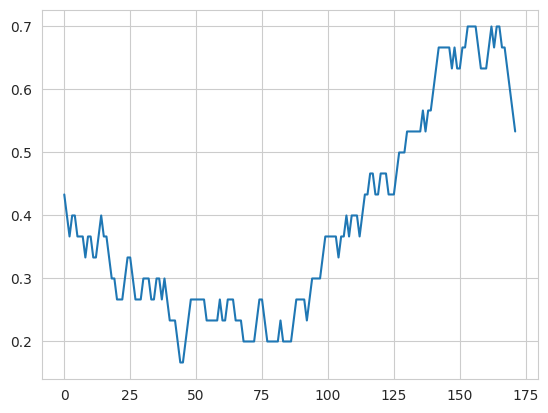

In [37]:
%matplotlib inline
MC.acceptances_plot(convolve_width=30)

In [48]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)
':)'

const_in: 7.903612372398382e-06


array([[0.00569284, 0.02764484],
       [0.02499793, 0.9416644 ]])

array([[0.17076292, 0.82923708],
       [0.02586004, 0.97413996]])

array([[0.00325768, 0.03008   ],
       [0.04177225, 0.92489007]])

array([[0.09771763, 0.90228237],
       [0.04321286, 0.95678714]])

':)'

(0.05, 0.12)

(0.8, 1.0)

<Figure size 640x480 with 0 Axes>

(0.06, 0.08)

(0.875, 1.0)

<Figure size 640x480 with 0 Axes>

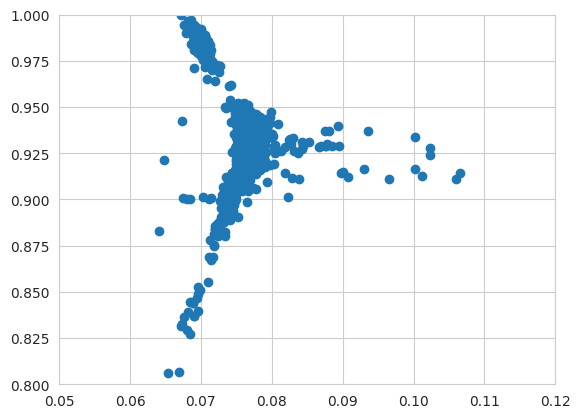

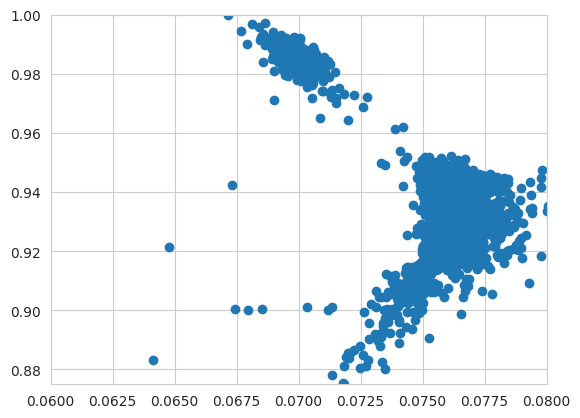

<Figure size 640x480 with 0 Axes>

In [51]:
%matplotlib inline
plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.xlim([0.05, 0.12])
plt.ylim([0.8, 1.0])
plt.figure()

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.xlim([0.06, 0.08])
plt.ylim([0.875, 1.0])
plt.figure()

# plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=1000)
# plt.xlim([0.06, 0.09])
# plt.ylim([0.0, 0.2])

(array([277., 194., 210., 217., 244., 223., 230., 223., 205., 227.]),
 array([0.        , 0.09999247, 0.19998495, 0.29997742, 0.3999699 ,
        0.49996237, 0.59995485, 0.69994732, 0.7999398 , 0.89993227,
        0.99992474]),
 <BarContainer object of 10 artists>)

<Figure size 640x480 with 0 Axes>

(array([252., 203., 214., 247., 237., 234., 221., 202., 216., 224.]),
 array([0.        , 0.09990712, 0.19981424, 0.29972137, 0.39962849,
        0.49953561, 0.59944273, 0.69934986, 0.79925698, 0.8991641 ,
        0.99907122]),
 <BarContainer object of 10 artists>)

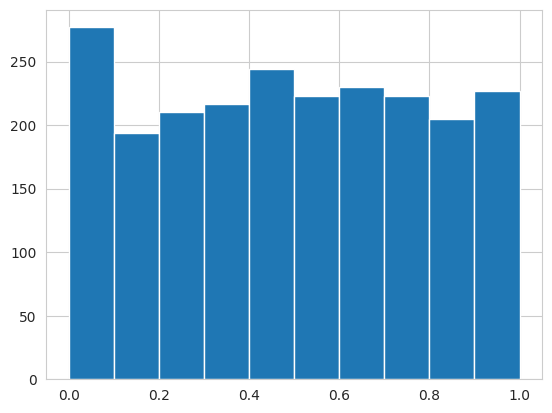

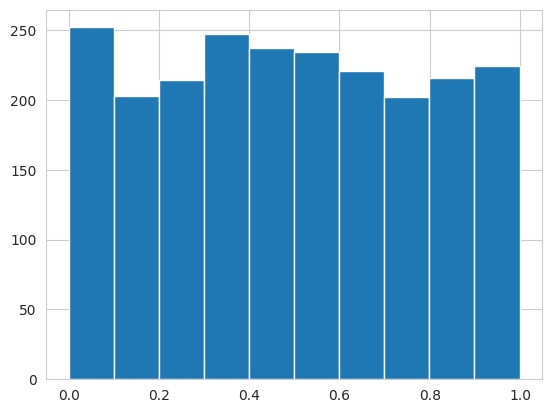

In [52]:
%matplotlib inline
plt.hist(MC.pts[:, 0])
plt.figure()
plt.hist(MC.pts[:, 1])


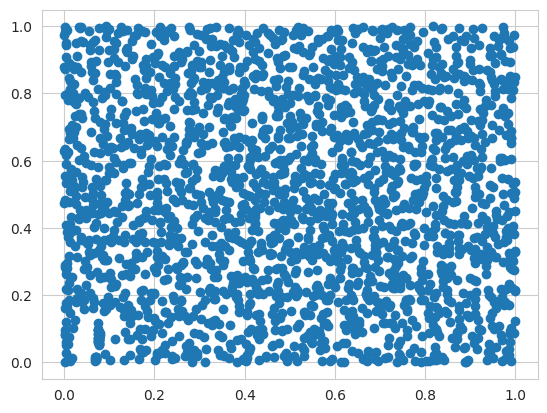

In [53]:
plt.scatter(MC.pts[:, 0], MC.pts[:, 1])

In [16]:
g_mc, A_mc = test_mcmc.MC_to_g_A(MC)
nk.overview(g_mc)

const_in: 0.17931646322859224
Network Properties:
nodes, edges			2250, 75074
directed?			False
weighted?			False
isolated nodes			14
self-loops			0
density				0.029672
clustering coefficient		0.313861
min/max/avg degree		0, 449, 66.732444
degree assortativity		0.071144
number of connected components	15
size of largest component	2236 (99.38 %)


In [17]:
CM = test_mcmc.quick_acc(A, A_mc)
CM
test_mcmc.quick_summarise_CM(CM)

CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)

':('

array([[0.0024798 , 0.03085788],
       [0.02717906, 0.93948326]])

array([[0.07438438, 0.92561562],
       [0.0281164 , 0.9718836 ]])

':('

In [9]:
a = df.loc[:, ['Graph', 'Model', 'Nodes', 'Info']]
a

,Graph,Model,Nodes,Info
0,socfb-Caltech36,1d-copyweight-cube-girg,756,"{'tau': 7.3017225936374555, 'alpha': 1.2171928..."
1,socfb-Reed98,1d-copyweight-cube-girg,955,"{'tau': 4.381732472502371, 'alpha': 1.07671601..."
2,socfb-Caltech36,2d-copyweight-cube-girg,757,"{'tau': 7.3017225936374555, 'alpha': 1.1949215..."
3,socfb-Simmons81,1d-copyweight-cube-girg,1497,"{'tau': 4.739342146243066, 'alpha': 1.16300199..."
4,socfb-Haverford76,1d-copyweight-cube-girg,1440,"{'tau': 6.5461700448727616, 'alpha': 1.0592519..."
...,...,...,...,...
157,socfb-Bingham82,2d-copyweight-cube-girg,9945,"{'tau': 5.959769046529775, 'alpha': 1.07671601..."
158,socfb-Maine59,3d-copyweight-cube-girg,9001,"{'tau': 5.253031117549527, 'alpha': 1.10401932..."
159,socfb-Mississippi66,2d-copyweight-cube-girg,10496,"{'tau': 5.425199038576664, 'alpha': 1.05073058..."
160,socfb-Georgetown15,3d-copyweight-cube-girg,9341,"{'tau': 4.898184083615165, 'alpha': 1.04234527..."


In [21]:
a.loc[a.Graph == 'socfb-Pepperdine86']

,Graph,Model,Nodes,Info
41,socfb-Pepperdine86,1d-copyweight-cube-girg,3430,"{'tau': 5.27297948141534, 'alpha': 1.059251903..."
53,socfb-Pepperdine86,2d-copyweight-cube-girg,3426,"{'tau': 5.27297948141534, 'alpha': 1.025969862..."
67,socfb-Pepperdine86,3d-copyweight-cube-girg,3430,"{'tau': 5.27297948141534, 'alpha': 1.010101010..."


In [22]:
df.iloc[41].Info

{'tau': 5.27297948141534,
 'alpha': 1.0592519033432637,
 'const': 0.10914879350912529,
 'target_lcc': 0.27697571394183823,
 'fit_lcc': 0.2790005420603239,
 'fitting_time': 180.74201369285583,
 'hist': [(2.0, 0.614930496642529),
  (1.342281879194631, 0.42023462193045735),
  (1.1527377521613833, 0.3257112505037432),
  (1.0767160161507403, 0.2855294469587692),
  (1.0423452768729642, 0.26787251887177715),
  (1.0592519033432637, 0.2766223208246902),
  (1.0679125646587686, 0.28514010229395503),
  (1.0592519033432637, 0.2766223208246902)]}

In [23]:
df.iloc[53].Info

{'tau': 5.27297948141534,
 'alpha': 1.0259698621353,
 'const': 0.059451413878825084,
 'target_lcc': 0.27697571394183823,
 'fit_lcc': 0.2748780151815607,
 'fitting_time': 289.33652424812317,
 'hist': [(2.0, 0.5849583176785574),
  (1.342281879194631, 0.4251694982750488),
  (1.1527377521613833, 0.3434494442734461),
  (1.0767160161507403, 0.30518489387359304),
  (1.0423452768729642, 0.2834073963759906),
  (1.0259698621353, 0.274660388413119),
  (1.0340927451930846, 0.28050691796757915),
  (1.0259698621353, 0.274660388413119)]}

In [32]:
import importlib
importlib.reload(test_mcmc)

<module 'tests.test_mcmc' from '../tests/test_mcmc.py'>

In [31]:
# gd = do_feature_extract.graph_dicts[21]

gd = list(filter(lambda x: x['Name'] == 'socfb-Pepperdine86', do_feature_extract.graph_dicts))[0]

in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

alpha = df.iloc[53].Info['alpha']
const = df.iloc[53].Info['const']

'/cluster/scratch/bdayan/GIRG_data/socfb-Pepperdine86.SpaceOne'

Network Properties:
nodes, edges			3440, 152003
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.025698
clustering coefficient		0.276976
min/max/avg degree		1, 674, 88.373837
degree assortativity		0.055527
number of connected components	1
size of largest component	3440 (100.00 %)


In [33]:
g, A, weights, const, pts_diffmap, pts_init, MC, MC_init = test_mcmc.test_diffmap_on_g(g, alpha=alpha, const=const, pts_d=2)

../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)


In [34]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
g_init, A_init = test_mcmc.MC_to_g_A(MC_init)
nk.overview(g_dm)
nk.overview(g_init)

CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)
':)'


const_in: 0.22909876856987865


../benji_girgs/generation.py:65: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:442: RuntimeWarning: divide by zero encountered in true_divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:443: RuntimeWarning: divide by zero encountered in true_divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


const_in: 0.22909876856987865
Network Properties:
nodes, edges			3440, 2987323
directed?			False
weighted?			False
isolated nodes			12
self-loops			0
density				0.505035
clustering coefficient		0.841734
min/max/avg degree		0, 2699, 1736.815698
degree assortativity		0.354706
number of connected components	13
size of largest component	3428 (99.65 %)
Network Properties:
nodes, edges			3440, 152170
directed?			False
weighted?			False
isolated nodes			15
self-loops			0
density				0.025726
clustering coefficient		0.276121
min/max/avg degree		0, 404, 88.470930
degree assortativity		0.041911
number of connected components	16
size of largest component	3425 (99.56 %)


array([[0.0238051 , 0.00188497],
       [0.48108319, 0.49322674]])

array([[0.92662645, 0.07337355],
       [0.49376812, 0.50623188]])

array([[0.00170988, 0.02398019],
       [0.02400842, 0.95030151]])

array([[0.0665579 , 0.9334421 ],
       [0.02464146, 0.97535854]])

':)'

In [ ]:
MC.run_pool(20000, pool_size=15, jobs_per_worker=15, plot_every=20)

In [4]:
from tests import test_mcmc
from tests.test_mcmc import *
import importlib
importlib.reload(test_mcmc)
g, A, weights, const, pts, pts_diffmap, pts_init, MC, MC_init, MC_cheat = test_mcmc.test_diffmap()

g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
g_init, A_init = test_mcmc.MC_to_g_A(MC_init)
g_cheat, A_cheat = test_mcmc.MC_to_g_A(MC_cheat)


<module 'tests.test_mcmc' from '../tests/test_mcmc.py'>

const_in: 21.744500891857935


../benji_girgs/generation.py:65: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:442: RuntimeWarning: divide by zero encountered in true_divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:443: RuntimeWarning: divide by zero encountered in true_divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)


const_in: 21.744500891857935
const_in: 21.744500891857935
const_in: 21.744500891857935


In [6]:
(const*2)**alpha

21.744500891857935

In [7]:
g_temp, _, _, _, _ = generation.generate_GIRG_nk(n, d, tau, alpha, weights=weights, pts=pts, const=const)

const_in: 21.744500891857935


In [8]:
const

6.507705243675296

In [9]:
pts

PointsCube([[0.63956876],
            [0.20144225],
            [0.07984331],
            ...,
            [0.88855468],
            [0.70501783],
            [0.04734976]])

In [10]:
nk.overview(g)
nk.overview(g_temp)

Network Properties:
nodes, edges			1500, 70397
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.062617
clustering coefficient		0.563041
min/max/avg degree		21, 1499, 93.862667
degree assortativity		-0.199725
number of connected components	1
size of largest component	1500 (100.00 %)
Network Properties:
nodes, edges			1500, 70327
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.062555
clustering coefficient		0.562545
min/max/avg degree		18, 1499, 93.769333
degree assortativity		-0.199262
number of connected components	1
size of largest component	1500 (100.00 %)


In [11]:
nk.overview(g_cheat)

Network Properties:
nodes, edges			1500, 70672
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.062861
clustering coefficient		0.560786
min/max/avg degree		21, 1499, 94.229333
degree assortativity		-0.199488
number of connected components	1
size of largest component	1500 (100.00 %)


In [12]:
nk.overview(g_dm)

Network Properties:
nodes, edges			1500, 77445
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.068886
clustering coefficient		0.570072
min/max/avg degree		10, 1499, 103.260000
degree assortativity		-0.197577
number of connected components	1
size of largest component	1500 (100.00 %)


In [18]:
CM = test_mcmc.quick_acc(A, A_cheat)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)


array([[0.03788   , 0.02469511],
       [0.02493956, 0.91248533]])

array([[0.6053525 , 0.3946475 ],
       [0.02660432, 0.97339568]])

array([[0.03113422, 0.03144089],
       [0.03770578, 0.89971911]])

array([[0.49754961, 0.50245039],
       [0.04022272, 0.95977728]])

array([[0.01840444, 0.04417067],
       [0.04421867, 0.89320622]])

array([[0.29411765, 0.70588235],
       [0.04717036, 0.95282964]])

In [20]:
np.where(A[0, :])

(array([   7,   15,   17,   20,   23,   38,   53,   75,   77,   86,   88,
          89,  113,  141,  166,  176,  216,  224,  247,  251,  252,  271,
         272,  279,  310,  320,  345,  347,  371,  379,  392,  419,  440,
         447,  452,  456,  469,  488,  493,  505,  522,  526,  545,  559,
         572,  574,  606,  612,  614,  621,  625,  643,  648,  653,  658,
         667,  673,  682,  717,  721,  736,  761,  762,  774,  782,  786,
         805,  817,  835,  837,  844,  849,  897,  900,  904,  917,  929,
         932,  941,  943,  949,  956,  960,  964,  968,  978,  997,  999,
        1017, 1019, 1053, 1062, 1087, 1097, 1100, 1117, 1135, 1140, 1150,
        1163, 1165, 1169, 1170, 1183, 1184, 1216, 1228, 1241, 1252, 1269,
        1284, 1321, 1326, 1338, 1345, 1362, 1382, 1383, 1391, 1397, 1402,
        1422, 1477, 1486]),)

In [14]:
list(g.iterNeighbors(0))

[18,
 66,
 98,
 116,
 169,
 176,
 187,
 198,
 260,
 302,
 311,
 343,
 361,
 367,
 1492,
 403,
 413,
 445,
 446,
 456,
 467,
 475,
 476,
 514,
 520,
 523,
 529,
 541,
 576,
 607,
 614,
 662,
 689,
 700,
 717,
 722,
 754,
 769,
 801,
 808,
 841,
 848,
 884,
 888,
 900,
 903,
 913,
 917,
 923,
 938,
 984,
 986,
 991,
 1006,
 1009,
 1015,
 1021,
 1034,
 1041,
 1042,
 1050,
 1051,
 1071,
 1104,
 1114,
 1169,
 1177,
 1179,
 1189,
 1234,
 1235,
 1255,
 1265,
 1297,
 1301,
 1317,
 1333,
 1344,
 1395,
 1438,
 1449,
 1454,
 1456,
 1459,
 1470,
 1472]

In [15]:
list(g_temp.iterNeighbors(0))

[18,
 66,
 75,
 86,
 98,
 116,
 126,
 169,
 173,
 176,
 192,
 194,
 198,
 212,
 229,
 256,
 260,
 302,
 311,
 343,
 361,
 362,
 367,
 403,
 413,
 433,
 446,
 456,
 467,
 476,
 514,
 517,
 521,
 523,
 529,
 607,
 613,
 648,
 692,
 712,
 714,
 722,
 740,
 754,
 764,
 801,
 836,
 841,
 884,
 888,
 900,
 929,
 950,
 984,
 986,
 991,
 1006,
 1050,
 1051,
 1065,
 1071,
 1104,
 1114,
 1169,
 1179,
 1189,
 1198,
 1218,
 1234,
 1235,
 1257,
 1301,
 1313,
 1317,
 1340,
 1344,
 1361,
 1413,
 1434,
 1438,
 1449,
 1454,
 1456,
 1498]

In [16]:
len(list(g_temp.iterNeighbors(0)))
len(list(g.iterNeighbors(0)))

84

86

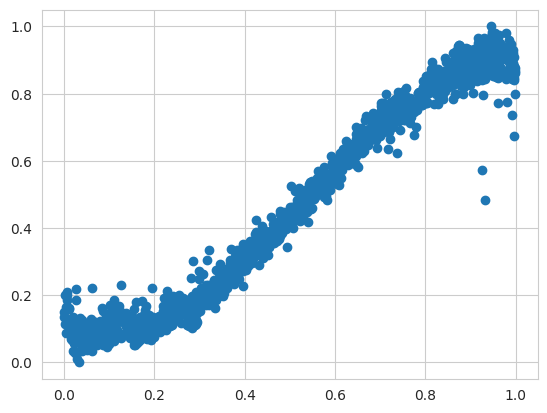

In [6]:
plt.scatter(pts[:, 0], pts_diffmap[:, 0])

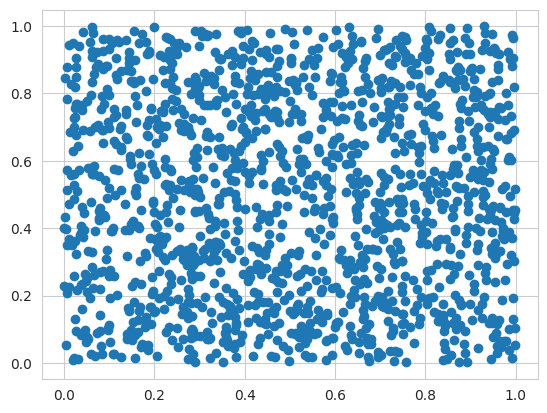

In [7]:
plt.scatter(pts[:, 0], pts_init[:, 0])